# Foundations of Data Mining: Assignment 2

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [2]:
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "none" 

In [3]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = '11e82c8d91c5abece86f424369c71590'

In [5]:
robot_data = oml.datasets.get_dataset(1497) # Download Robot data
# Get the predictors X and the labels y
X, y = robot_data.get_data(target=robot_data.default_target_attribute); 

## Gaussian Processes (2 points (1+1))

Consider the RAM prices dataset (included in the data folder). Separate the data in a training set of all data points up until the year 2000, and a test set with all points after that.

- Train several of the algorithms we have covered in the course that can handle regression. Include at least linear regression, decision tree, and RandomForest. Which ones give the best $R^2$ performance on the test set? Plot the predictions (both on the training and test data) on the figure below. Use different colors for different algorithms or build multiple plots.
- Train a Gaussian process on an increasing amount of samples of the training data. Start with 5 random sample and plot the predictions (both the mean and the uncertainty interval) for both training and test data, as shown in class. Now add 5 more points and retrain and redraw. Do this a couple of times and interpret/explain what you see. Finally, train the Gaussian on the full dataset and again show plot the predictions. Evaluate on the test set using  $R^2$. Compare these results with those achieved with other algorithms and explain.

In [24]:
ram_prices = pd.read_csv('data/ram_price.csv')


In [22]:
#training linear regression, decision tree, and RandomForest, KNeighborsRegressor
ram_prices.describe()

X = ram_prices[["date"]].values
y = ram_prices[["price"]].values

ram_prices_train = ram_prices[ram_prices['date'] <= 2000]
X_train = ram_prices_train[["date"]].values
y_train = ram_prices_train[["price"]].values

ram_prices_test = ram_prices[ram_prices['date'] > 2000]
X_test = ram_prices_test[["date"]].values
y_test = ram_prices_test[["price"]].values


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [41]:
# linear regression

lr = LinearRegression().fit(X_train, np.log(y_train))
lr_train_prediction = lr.predict(X_train)
lr_test_prediction = lr.predict(X_test)

print("Training set score (R^2): {:.2f}".format(lr.score(X_train, np.log(y_train))))
print("Test set score (R^2): {:.2f}".format(lr.score(X_test, np.log(y_test))))

Training set score (R^2): 0.96
Test set score (R^2): 0.82


In [42]:
# decision tree
dtree = tree.DecisionTreeRegressor()
dtree = dtree.fit(X_train, np.log(y_train))

dtree_train_prediction = dtree.predict(X_train)
dtree_test_prediction = dtree.predict(X_test)

print("Training set score (R^2): {:.2f}".format(dtree.score(X_train, np.log(y_train))))
print("Test set score (R^2): {:.2f}".format(dtree.score(X_test, np.log(y_test))))

Training set score (R^2): 1.00
Test set score (R^2): -4.39


In [43]:
# random forest
rf = RandomForestRegressor(n_estimators=10)
rf = rf.fit(X_train, np.log(y_train))
rf_train_prediction = rf.predict(X_train)
rf_test_prediction = rf.predict(X_test)

print("Training set score (R^2): {:.2f}".format(rf.score(X_train, np.log(y_train))))
print("Test set score (R^2): {:.2f}".format(rf.score(X_test, np.log(y_test))))

Training set score (R^2): 1.00
Test set score (R^2): -4.49


In [44]:
#KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn = knn.fit(X_train, np.log(y_train))
knn_train_prediction = knn.predict(X_train)
knn_test_prediction = knn.predict(X_test)

print("Training set score (R^2): {:.2f}".format(knn.score(X_train, np.log(y_train))))
print("Test set score (R^2): {:.2f}".format(knn.score(X_test, np.log(y_test))))

Training set score (R^2): 0.99
Test set score (R^2): -4.04


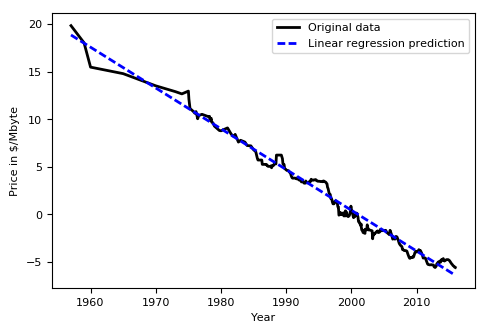

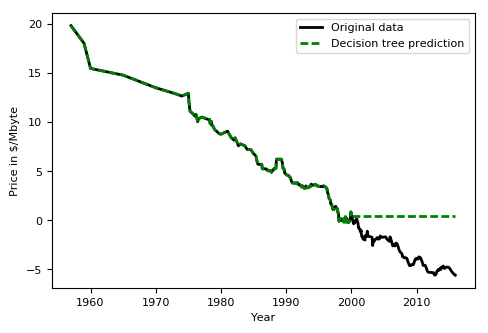

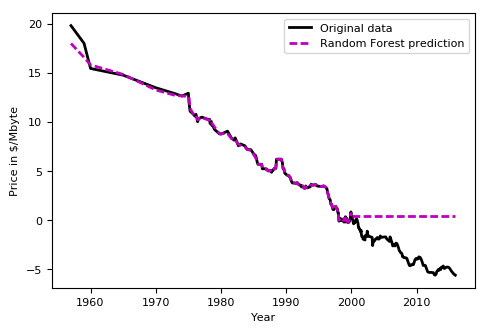

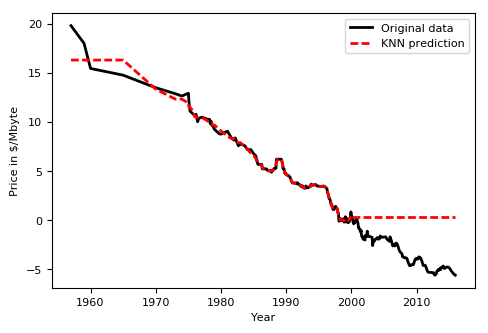

In [55]:
plt.figure(1)

plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.plot(ram_prices.date, np.log(ram_prices.price), 'k', linewidth=2.0, label='Original data')
plt.plot(X_train, lr_train_prediction, 'b--', linewidth=2.0, label='Linear regression prediction')
plt.plot(X_test, lr_test_prediction, 'b--', linewidth=2.0)
plt.legend(loc='upper right')
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte");

plt.figure(figsize=(12, 8))
plt.subplot(222)
plt.plot(ram_prices.date, np.log(ram_prices.price), 'k', linewidth=2.0, label='Original data')
plt.plot(X_train, dtree_train_prediction, 'g--', linewidth=2.0, label='Decision tree prediction')
plt.plot(X_test, dtree_test_prediction, 'g--', linewidth=2.0)
plt.legend(loc='upper right')
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte");

plt.figure(figsize=(12, 8))
plt.subplot(223)
plt.plot(ram_prices.date, np.log(ram_prices.price), 'k', linewidth=2.0, label='Original data')
plt.plot(X_train, rf_train_prediction, 'm--', linewidth=2.0, label='Random Forest prediction')
plt.plot(X_test, rf_test_prediction, 'm--', linewidth=2.0)
plt.legend(loc='upper right')
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte");

plt.figure(figsize=(12, 8))
plt.subplot(224)
plt.plot(ram_prices.date, np.log(ram_prices.price), 'k', linewidth=2.0, label='Original data')
plt.plot(X_train, knn_train_prediction, 'r--', linewidth=2.0, label='KNN prediction')
plt.plot(X_test, knn_test_prediction, 'r--', linewidth=2.0)
plt.legend(loc='upper right')
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte");

plt.show()



In [13]:
def sample_data(X, y, n):
    l = X.size
    indices = np.random.choice(l, n)
    return X[indices], y[indices]
    

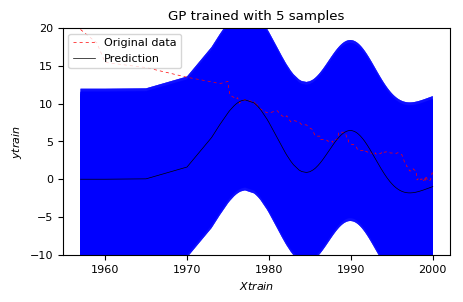

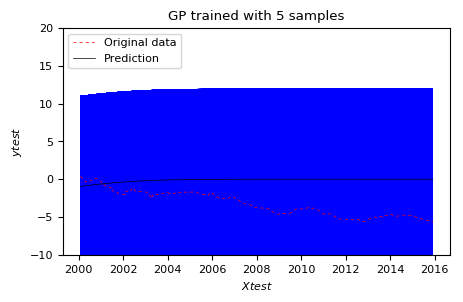

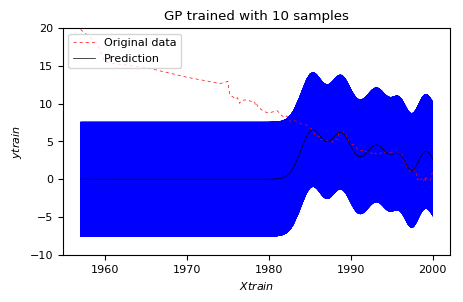

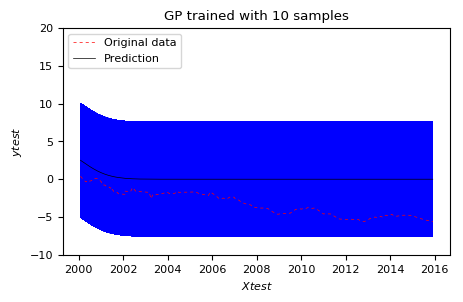

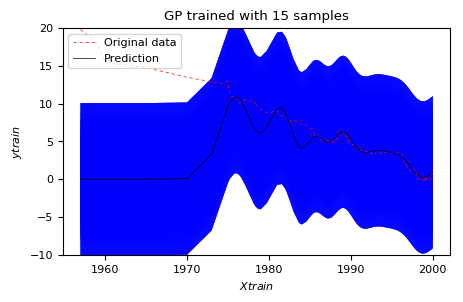

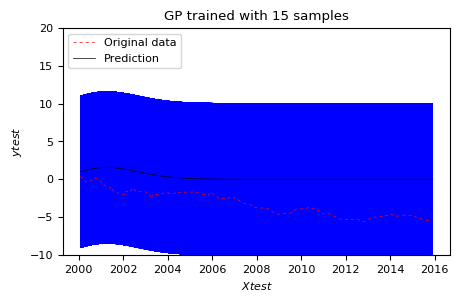

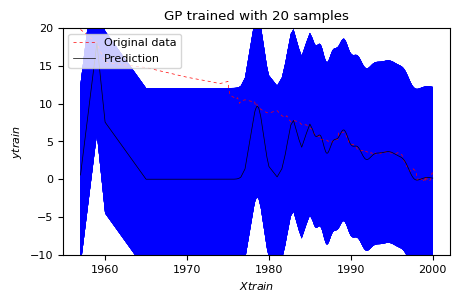

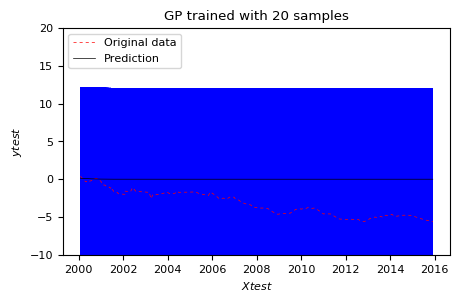

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

y_scaled_train = np.log(y_train)
y_scaled_test = np.log(y_test)

sample_sizes = [5,10,15,20]
for sample_size in sample_sizes:

    # Instanciate a Gaussian Process model
    kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

    X_sampled, y_sampled = sample_data(X_train, y_scaled_train, sample_size)
    # Fit to data using Maximum Likelihood Estimation of the parameters
    gp.fit(X_sampled, y_sampled)

    # Make the prediction on the meshed x-axis (ask for MSE as well)
    y_train_pred, sigma_train = gp.predict(X_train, return_std=True)
    y_test_pred, sigma_test = gp.predict(X_test, return_std=True)

    # Plot the data, the prediction and the 95% confidence interval based on
    # the MSE
    fig = plt.figure()
    plt.plot(X_train, y_scaled_train, 'r:', label=u'Original data')
    #plt.plot(X_sampled, y_sampled, 'r.', markersize=10, label=u'Observations')
    plt.plot(X_train, y_train_pred, 'k-', label=u'Prediction')
    plt.fill(np.concatenate([X_train, X_train[::-1]]),
             np.concatenate([y_train_pred - 1.9600 * sigma_train,
                             (y_train_pred + 1.9600 * sigma_train)[::-1]]),
             alpha=.5, fc='b', ec='None')#, label='95% confidence interval')
    plt.xlabel('$X train$')
    plt.ylabel('$y train$')
    plt.ylim(-10, 20)
    plt.title("GP trained with " + str(sample_size) + " samples")
    plt.legend(loc='upper left')

    # Plot the data, the prediction and the 95% confidence interval based on
    # the MSE
    fig = plt.figure()
    plt.plot(X_test, y_scaled_test, 'r:', label=u'Original data')
    #plt.plot(X_sampled, y_sampled, 'r.', markersize=10, label=u'Observations')
    plt.plot(X_test, y_test_pred, 'k-', label=u'Prediction')
    plt.fill(np.concatenate([X_test, X_test[::-1]]),
             np.concatenate([y_test_pred - 1.9600 * sigma_test,
                            (y_test_pred + 1.9600 * sigma_test)[::-1]]),
             alpha=.5, fc='b', ec='None')#, label='95% confidence interval')
    plt.xlabel('$X test$')
    plt.ylabel('$y test$')
    plt.ylim(-10, 20)
    plt.title("GP trained with " + str(sample_size) + " samples")
    plt.legend(loc='upper left')

Train a Gaussian process on an increasing amount of samples of the training data. Start with 5 random sample and plot the predictions (both the mean and the uncertainty interval) for both training and test data, as shown in class. Now add 5 more points and retrain and redraw. Do this a couple of times and interpret/explain what you see. Finally, train the Gaussian on the full dataset and again show plot the predictions. Evaluate on the test set using  R2R2 . Compare these results with those achieved with other algorithms and explain.

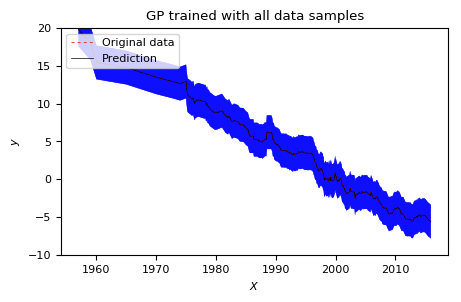

In [23]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

y_scaled = np.log(y)

# Instanciate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y_scaled)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(X, return_std=True)

# Plot the data, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(X, y_scaled, 'r:', label=u'Original data')
#plt.plot(X_sampled, y_sampled, 'r.', markersize=10, label=u'Observations')
plt.plot(X, y_pred, 'k-', label=u'Prediction')
plt.fill(np.concatenate([X, X[::-1]]),
        np.concatenate([y_pred - 1.9600 * sigma,
                      (y_pred + 1.9600 * sigma)[::-1]]),
        alpha=.5, fc='b', ec='None')#, label='95% confidence interval')
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.ylim(-10, 20)
plt.title("GP trained with all data samples")
plt.legend(loc='upper left')
